
# Clustering: Application to Fashion MNIST

In this example, we will use the K-means clustering technique to explore a "unknown" dataset: Fashion MNIST. 

The idea is to consider the Fashion MNIST dataset and to classify its content in an unsupervised manner. The resulting clusters are then compared to the 10 known classes of dataset. 


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("fashion-mnist_test.csv")
X = df.iloc[:, 1:] # The Original matrix. Each row is an 28x28 gray-level image.
y = df.iloc[:, :1] # The class of the image.

## A quick look to the dataset

The full description of this datset is available following the URL:
https://www.kaggle.com/datasets/zalando-research/fashionmnist


The number of images = 10000
The number of classes = 10


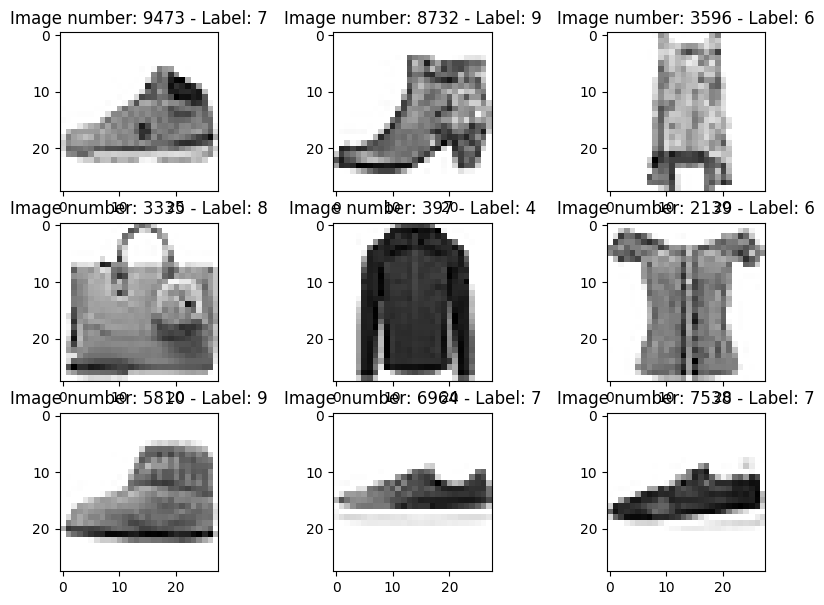

In [3]:
from matplotlib import pyplot as plt

Xn = X.values 
yn = y.values 

number_images = Xn.shape[0]
number_classes = np.unique(yn).size # Other solution : yn.max()+1

print('The number of images = {}'.format(number_images))
print('The number of classes = {}'.format(number_classes))

j = 1
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
for i in range(9):
    cur = np.random.randint(number_images)
    fig.add_subplot(3,3,j)
    plt.imshow(Xn[cur].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.title('Image number: {} - Label: {}'.format(cur, yn[cur,0]))
    #plt.colorbar()                                         
    j=j+1

plt.show()



## Preprocessing the dataset using PCA 

PCA is used in order to reduce the dimension of the data while preserving most of the information, we first pre-process the dataset so that we get rid of useless dimensions.

Here, we :
- Apply PCA on data stored in X and keep 90% of expressed variance.
- Transform the data X using the computed PCA and store the result in X_r.
- Print the original dimension of the dataset.
- Print the dimension of the dataset after PCA.


In [4]:
from sklearn.decomposition import PCA

pca = PCA(0.90)
Xn_r = pca.fit(Xn).transform(Xn)

print("Original dimension of the dataset (before PCA)  = " + str(Xn.shape[1]))
print("Number of dimensions after PCA (0.90) = " + str(pca.n_components_)) 


Original dimension of the dataset (before PCA)  = 784
Number of dimensions after PCA (0.90) = 82


## K-Means

Let's first apply k-means on the PCA transformed vectors of the dataset.
The target number of k-means centroids = 1000.

Print the number of obtained clusters and store this value in "nb_clusts".

Use for that: The package "sklearn.cluster" (from sklearn.cluster import KMeans)

In [5]:
target_nb_clusts = 1000

k_means = KMeans(target_nb_clusts).fit(Xn_r)

nb_clusts = k_means.n_clusters

print("The numbers of k-means resulting clusters is ", nb_clusts)

C:\Users\hugop\Desktop\Cours\Année 5\Modelisation\TDP\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The numbers of k-means resulting clusters is  1000


### Before going further, let's study the properties of our clusters

The first thing to do is to create **nb_clusts** lists named **cluster_index**, where:
- **cluster_index[i]** contains the indices from **X** of vectors that belong to cluster # **i**.

In [6]:
#2D matrix  for an array of indexes of the given label
cluster_index= [[] for j in range(nb_clusts)]

for i in range(Xn_r.shape[0]):
    for j in range(nb_clusts):
        if k_means.labels_[i] == j:
            cluster_index[j].append(i)


In order to assess the quality of produced clusters, here we will visualize the content of few clusters. 

Clust is the variable in which we set the cliuster to visualize

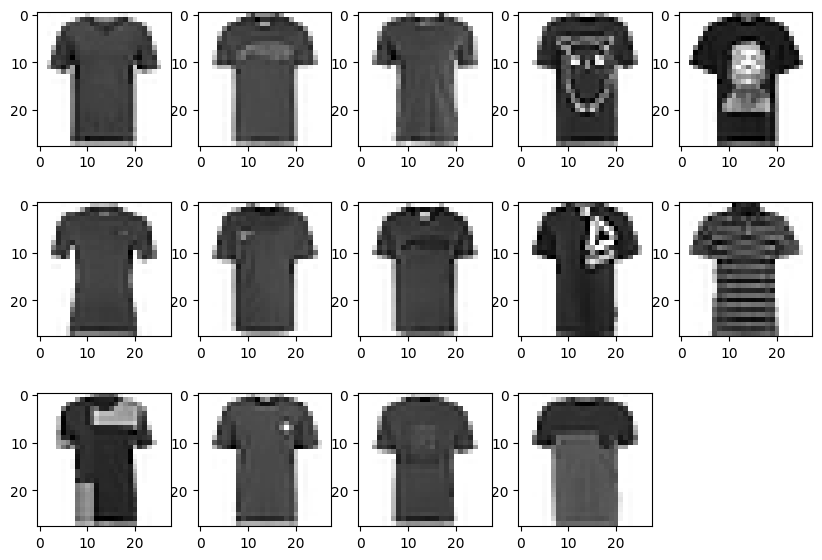

In [7]:
fig = plt.figure();
fig.set_figheight(7)
fig.set_figwidth(10)

clust = 12 # ID of cluster to visualize

clusterI = cluster_index[clust]

nb_col_fig = 5
nb_lig_fig = (len(clusterI) // nb_col_fig)+1

clusterL = []

j=1
for i in clusterI: 
    plt.subplot(nb_lig_fig, nb_col_fig, j); 
    plt.imshow(Xn[i].reshape(28, 28), cmap='gray_r');
    clusterL.append(yn[i,0])
    j=j+1

plt.show()

We can even plot the histogram of the class labels of vectors contained in the cluster.

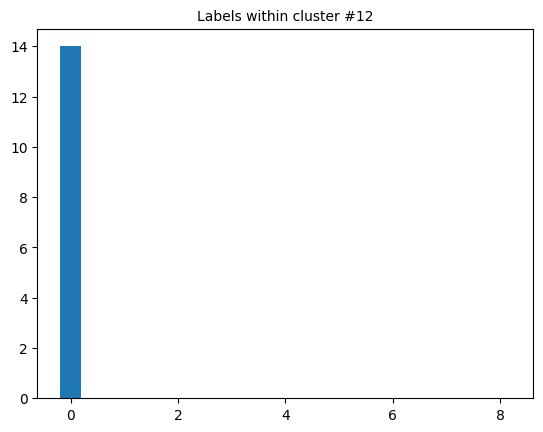

In [8]:
plt.hist(clusterL, bins=range(10), rwidth=0.4, align='left')

plt.title('Labels within cluster #{}'.format(clust), fontsize=10)

plt.show()


## Further experiments:
#### 1 - Perform the clustering using a value of k equals to the number of classes in the dataset, i.e. k = 10. What do you notice?

#### 2 - Perform again the clustering (k=1000) without the preprocessing step using PCA, i.e. without any dimensionality reduction? Analyse the result and compare it to the result with PCA.

#### 3 - If you perform two different clustering (varying internal parameters: k, with/without PCA...), how can you compare the quality of the resulting clusters? Try to propose an measure for that.

#### 1)

In [9]:
target_nb_clusts = 10

k_means = KMeans(target_nb_clusts).fit(Xn_r)

nb_clusts = k_means.n_clusters

print("The numbers of k-means resulting clusters is ", nb_clusts)

C:\Users\hugop\Desktop\Cours\Année 5\Modelisation\TDP\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The numbers of k-means resulting clusters is  10


With a K equal to 10, it took 0.66 second to process

In [10]:
target_nb_clusts = 1000

k_means = KMeans(target_nb_clusts).fit(Xn)

nb_clusts = k_means.n_clusters

print("The numbers of k-means resulting clusters is ", nb_clusts)

C:\Users\hugop\Desktop\Cours\Année 5\Modelisation\TDP\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The numbers of k-means resulting clusters is  1000


This time with a K equal to 1000, it tooks slightly less than 2 minutes. So we can conclude that the higher K is, the longer is the computing time

#### 2)

In [11]:
target_nb_clusts = 1000

k_means = KMeans(target_nb_clusts).fit(Xn)

inertia = k_means.inertia_

print("The inertia of k_means without PCA and with target number clusters of 1000 is ", inertia)

C:\Users\hugop\Desktop\Cours\Année 5\Modelisation\TDP\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The inertia of k_means without PCA and with target number clusters of 1000 is  8352413320.046745


In [12]:
target_nb_clusts = 1000

k_means = KMeans(target_nb_clusts).fit(Xn_r)

inertia = k_means.inertia_

print("The inertia of k_means after PCA and with target number clusters of 1000 is ", inertia)

C:\Users\hugop\Desktop\Cours\Année 5\Modelisation\TDP\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The inertia of k_means after PCA and with target number clusters of 1000 is  4692047017.043235


The inertia being lower after PCA means that the uses of PCA is (considerably) improving our final result.
(Samples are closer to their closest cluster center)
 
#### 3)

In [13]:
target_nb_clusts = 10

k_means = KMeans(target_nb_clusts).fit(Xn_r)

inertia = k_means.inertia_

print("The inertia of k_means after PCA and with target number clusters of 10 is ", inertia)

C:\Users\hugop\Desktop\Cours\Année 5\Modelisation\TDP\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The inertia of k_means after PCA and with target number clusters of 10 is  16228142887.300892


In [14]:
target_nb_clusts = 10

k_means = KMeans(target_nb_clusts).fit(Xn)

inertia = k_means.inertia_

print("The inertia of k_means without PCA and with target number clusters of 10 is ", inertia)

C:\Users\hugop\Desktop\Cours\Année 5\Modelisation\TDP\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The inertia of k_means without PCA and with target number clusters of 10 is  20761738623.01719


Reducing our number of clusters has actually reduced our inertia. But doing a PCA before is still better and improving the result.

## Your final report here:



The target number of clusters have a high significance on the quality of the result, the higher the better. But it takes a lot of time and energy to do the process.
Doing a PCA preprocess is also significantly improving the result. 

In a nutshell, we must do a compromise between time/energy consuming and quality of the output

We could use, after the PCA preprocess, the Elbow Method to find the most optimal K and so, getting the most optimal result for our data. 

#### Personal bonus

100%|██████████| 90/90 [11:02<00:00,  7.36s/it]


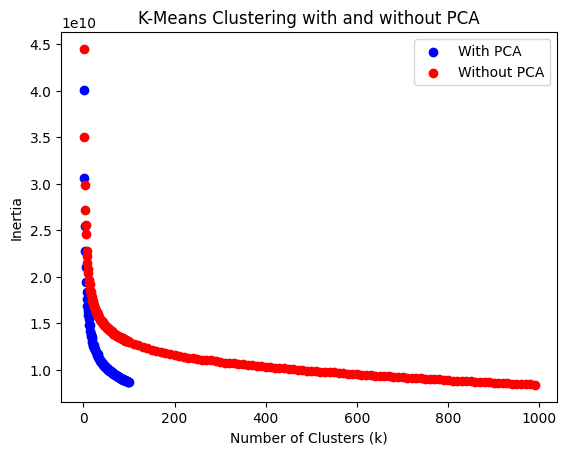

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import tqdm

Inertia_WithPCA = []
Inertia_WithoutPCA = []

for i in tqdm.tqdm(range(1,100)):
    k_means = KMeans(i, n_init='auto')
    k_means.fit(Xn_r)
    Inertia_WithPCA.append([i, k_means.inertia_])
    k_means.fit(Xn)
    Inertia_WithoutPCA.append([i, k_means.inertia_])

for i in tqdm.tqdm(range(100,1000, 10)):
    k_means = KMeans(i, n_init='auto')
    k_means.fit(Xn_r)
    Inertia_K.append([i, k_means.inertia_])
    k_means.fit(Xn)
    Inertia_WithoutPCA.append([i, k_means.inertia_])

withPCA = np.array(Inertia_WithPCA)
withoutPCA = np.array(Inertia_WithoutPCA)

x_with_pca, y_with_pca = withPCA.T
x_without_pca, y_without_pca = withoutPCA.T

plt.scatter(x_with_pca, y_with_pca, label='With PCA', color='blue')
plt.scatter(x_without_pca, y_without_pca, label='Without PCA', color='red')

plt.legend()
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-Means Clustering with and without PCA')

plt.show()

(Even tho my computer struggled to compute the last points with PCA), we can visually confirm that doing a PCA preprocessing is better. The most optimal K value seems to be between 60-110

100%|██████████| 199/199 [00:43<00:00,  4.63it/s]


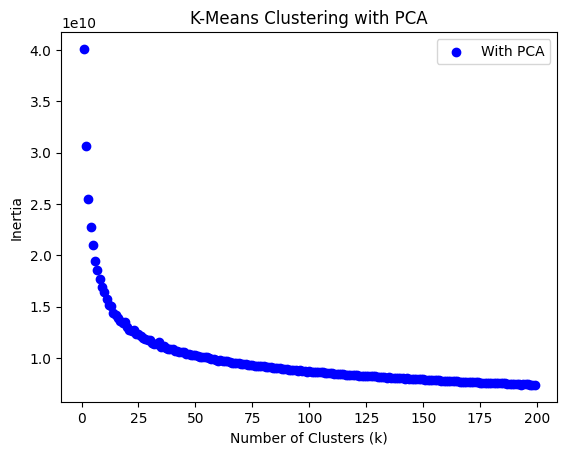

In [20]:
Inertia_WithPCA = []

for i in tqdm.tqdm(range(1,200, 1)):
    k_means = KMeans(i, n_init='auto')
    k_means.fit(Xn_r)
    Inertia_WithPCA.append([i, k_means.inertia_])

withPCA = np.array(Inertia_WithPCA)

x_with_pca, y_with_pca = withPCA.T

plt.scatter(x_with_pca, y_with_pca, label='With PCA', color='blue')

plt.legend()
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-Means Clustering with PCA')

plt.show()